## Exercise 1

Can you write a that fits a 3rd order polynomial to data?
    
$y = a x^3 + b x^2 + c x + d$

- Start by looking up what a PyTorch `Parameter`. This [list of PyTorch building blocks](https://pytorch.org/docs/stable/nn.html#containers) is a good reference.
- Decide what your forward function will be -- it should map your inputs to a prediction.
- Implement a mean squared error loss function. It should compare your prediction to truth.

Bonus: Rewrite your loss function to use an L1 loss. Search  for it [here](https://pytorch.org/docs/stable/nn.functional.html) and include it in your code.

Bonus #2:  Add regularization! You've only got 4 parameters -- `a, b, c, d` -- but you can still regularize them!

### Boilerplate

This sets up a synthetic dataset 

(7500,) (2500,) (7500,) (2500,)


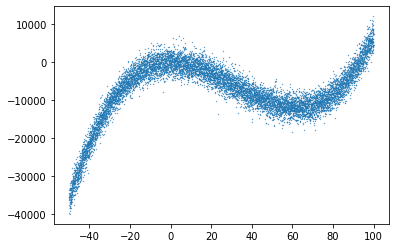

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

n = 10000
# X is just a uniformly distributed 1D dataset
X = np.linspace(-50, 100, n)
# The prediction is the image of the cubic transformation
Y = 0.1 * X**3.0 - 9.3 * X**2.0 + 0.1 * X - 0.2 + np.random.normal(size=n) * 2000.0
Y = Y.astype(np.float32)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
plt.scatter(X, Y, s = 0.1)

#### Model definition

Fill out the code within `__init__` and `forward`.

In [5]:
import torch
from torch import nn
from torch.nn import functional as F
import pytorch_lightning as pl


class Cubic(pl.LightningModule):
    def __init__(self):
        super(Cubic, self).__init__()
        # **** FILL ME IN *****
    
    def forward(self, x):
        # **** FILL IN LINES BELOW **** 
        return prediction

    def training_step(self, batch, batch_nb):
        x, y = batch
        prediction = self.forward(x)
        # **** FILL IN LINES BELOW **** 
        mse = 0.0 
        return {'loss': mse, 'log': {'mse': mse}}
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-2)

#### Model instantiation

In [16]:
from pytorch_lightning.logging import WandbLogger

model = Cubic()

# add a logger
logger = WandbLogger(name="00C_exercise", log_model=True, project="simple_mf")

trainer = pl.Trainer(max_epochs=100, progress_bar_refresh_rate=1,
                     reload_dataloaders_every_epoch=True,
                     logger=logger)    


GPU available: True, used: False
TPU available: False, using: 0 TPU cores


Fit the model

In [17]:
model.a, model.b, model.c, model.d

(Parameter containing:
 tensor([0.9749], requires_grad=True),
 Parameter containing:
 tensor([0.0701], requires_grad=True),
 Parameter containing:
 tensor([0.4726], requires_grad=True),
 Parameter containing:
 tensor([0.4030], requires_grad=True))

Review model before it has been fit. As expected, the model and data do not agree at all.

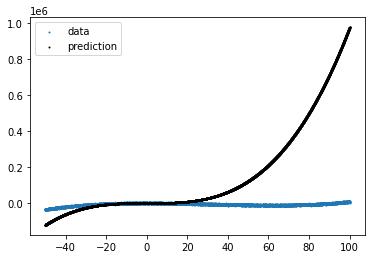

In [24]:
Y_pred = (model.a.detach().numpy() * X**3.0 
          + model.b.detach().numpy() * X**2.0 
          + model.c.detach().numpy() * X 
          + model.d.detach().numpy())

plt.scatter(X, Y, s=1., label="data")
plt.scatter(X, Y_pred, s=1., c='k', label="prediction")
plt.legend()

In [25]:
import numpy as np
from random import shuffle
from torch import from_numpy
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torch.utils.data import BatchSampler
from torch.utils.data import RandomSampler

dataset = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(Y_train))
bs = BatchSampler(RandomSampler(dataset), 
                  batch_size=128, drop_last=False)
train_loader = DataLoader(dataset, batch_sampler=bs, num_workers=8)

In [30]:
dataset = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(Y_test))
bs = BatchSampler(RandomSampler(dataset), 
                  batch_size=128, drop_last=False)
test_loader = DataLoader(dataset, batch_sampler=bs, num_workers=8)

In [26]:
trainer.fit(model, train_loader)

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable

  | Name | Type | Params
------------------------------


1

In [27]:
model.a, model.b, model.c, model.d

(Parameter containing:
 tensor([0.0862], requires_grad=True),
 Parameter containing:
 tensor([-8.0842], requires_grad=True),
 Parameter containing:
 tensor([-0.1482], requires_grad=True),
 Parameter containing:
 tensor([-22.1397], requires_grad=True))

#### Plot the model predictions against the training data

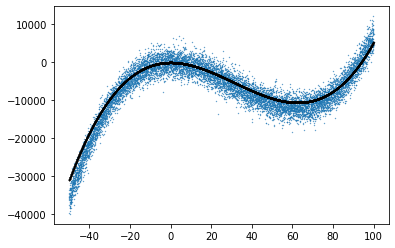

In [28]:
Y_pred = (model.a.detach().numpy() * X**3.0 
          + model.b.detach().numpy() * X**2.0 
          + model.c.detach().numpy() * X 
          + model.d.detach().numpy())

plt.scatter(X, Y, s=0.1)
plt.scatter(X, Y_pred, s=0.1, c='k')

#### SOLUTION

#### Spoiler alert! Don't look here until you're ready.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

In [29]:
import torch
from torch import nn
from torch.nn import functional as F
import pytorch_lightning as pl


class Cubic(pl.LightningModule):
    def __init__(self):
        super(Cubic, self).__init__()
        # **** FILL ME IN *****
        self.a = nn.Parameter(torch.rand(1))
        self.b = nn.Parameter(torch.rand(1))
        self.c = nn.Parameter(torch.rand(1))
        self.d = nn.Parameter(torch.rand(1))
    
    def forward(self, x):
        # **** FILL ME IN **** 
        prediction = self.a * x**3.0 + self.b * x**2.0 + self.c * x + self.d
        return prediction

    def training_step(self, batch, batch_nb):
        x, y = batch
        prediction = self.forward(x)
        mse = ((prediction - y)**2.0).mean()
        # And for L1 loss
        mae = F.l1_loss(prediction, y)
        return {'loss': mse, 'log': {'mse': mse}}
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-2)